In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import pytorch_lightning as pl

In [2]:
import os
from PIL import Image
from tqdm import tqdm

data_path = "./PetImages/"

def is_image_corrupted(image_path):
    try:
        _ = Image.open(image_path)
        return False
    except (IOError, SyntaxError):
        return True

def delete_corrupted_images(folder_path):
    num_corrupted_images = 0
    with tqdm(total=len(os.listdir(folder_path)), desc="Deleting corrupted images") as pbar:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                image_path = os.path.join(root, file)
                if is_image_corrupted(image_path):
                    num_corrupted_images += 1
                    os.remove(image_path)
                pbar.update(1)
    print(f"Deleted {num_corrupted_images} corrupted images.")

# Call the function to delete corrupted images
delete_corrupted_images(data_path)


Deleting corrupted images: 5894it [00:00, 19776.28it/s]         /home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))
Deleting corrupted images: 24998it [00:01, 17415.96it/s]

Deleted 0 corrupted images.


In [3]:

class CatDogClassifier(pl.LightningModule):
    def __init__(self):
        super(CatDogClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(64 * 56 * 56, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1)
        )
        self.criterion = nn.NLLLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.forward(inputs)
        loss = self.criterion(outputs, labels)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.forward(inputs)
        loss = self.criterion(outputs, labels)
        self.log('val_loss', loss)
        return loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.001)



In [4]:
# Set paths and parameters
data_path = "./PetImages/"
test_split = 0.2
batch_size = 32

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
# Load the dataset
dataset = ImageFolder(data_path, transform=transform)

In [6]:
# Split the dataset into train and test sets
train_size = int(len(dataset) * (1 - test_split))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [7]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [8]:
# Create the model and trainer
model = CatDogClassifier()
trainer = pl.Trainer(max_epochs=10) 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [10]:
# load model from saved checkpoint

model = CatDogClassifier.load_from_checkpoint("/home/venom/repo/AI101-Cats-and-Dogs-CNN/lightning_logs/version_5/checkpoints/epoch=9-step=6250.ckpt")

In [16]:
# Train the model
trainer.fit(model, train_loader, test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type       | Params
-----------------------------------------
0 | model     | Sequential | 25.7 M
1 | criterion | NLLLoss    | 0     
-----------------------------------------
25.7 M    Trainable params
0         Non-trainable params
25.7 M    Total params
102.840   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

/home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

/home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

/home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

/home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

/home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

/home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

/home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

/home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

/home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

/home/venom/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [21]:
# check accuracy on test set

correct = 0
total = 0

model.cuda()
with torch.no_grad() and tqdm(total=len(test_loader), desc="Testing") as pbar:
    for images, labels in test_loader:
        outputs = model(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()
        pbar.update(1)

Testing: 100%|██████████| 157/157 [00:04<00:00, 33.61it/s]


In [22]:
print(f"Accuracy: {100 * correct / total}%")

Accuracy: 75.88%


Testing: 100%|██████████| 16/16 [00:01<00:00, 10.57it/s]


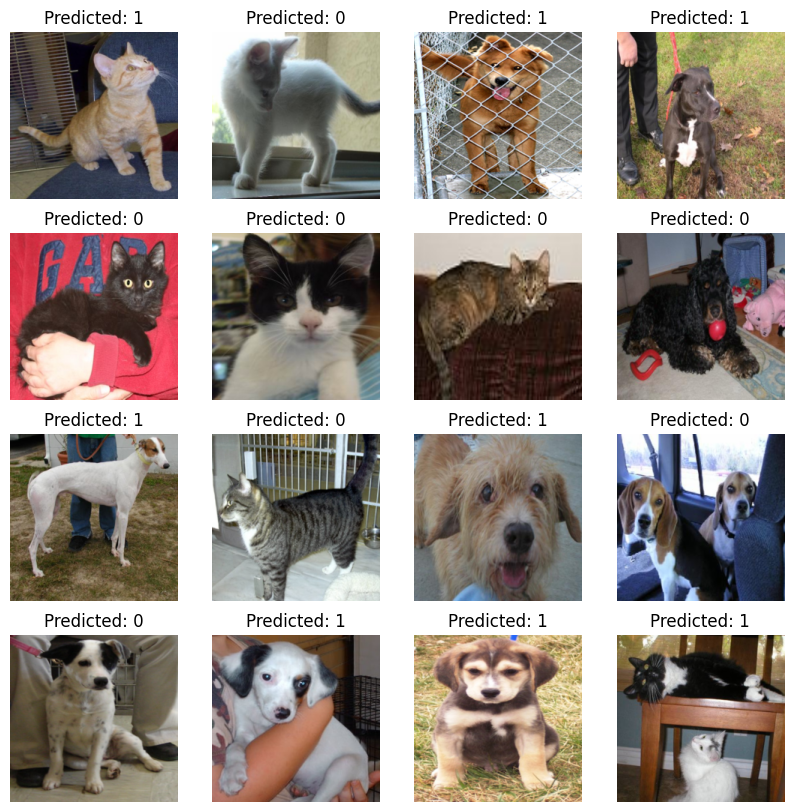

In [26]:
# plot few images and their predictions from test set grid 4 x 4

import matplotlib.pyplot as plt

model.cuda()

fig = plt.figure(figsize=(10, 10))

with torch.no_grad() and tqdm(total=16, desc="Testing") as pbar:
    for i, (images, labels) in enumerate(test_loader):
        if i == 16:
            break
        outputs = model(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        ax = plt.subplot(4, 4, i + 1)
        ax.axis('off')
        ax.set_title(f'Predicted: {predicted.cpu().numpy()[0]}')
        img = images[0] / 2 + 0.5     # unnormalize
        plt.imshow(img.permute(1, 2, 0))
        pbar.update(1)


In [11]:
# save the model to onnx

torch.onnx.export(model, torch.randn(1, 3, 224, 224).cuda(), "cat_dog_classifier.onnx", verbose=True)

# save model

torch.save(model, "cat_dog_classifier.pth")

Exported graph: graph(%input.1 : Float(1, 3, 224, 224, strides=[150528, 50176, 224, 1], requires_grad=0, device=cuda:0),
      %model.0.weight : Float(32, 3, 3, 3, strides=[27, 9, 3, 1], requires_grad=1, device=cuda:0),
      %model.0.bias : Float(32, strides=[1], requires_grad=1, device=cuda:0),
      %model.3.weight : Float(64, 32, 3, 3, strides=[288, 9, 3, 1], requires_grad=1, device=cuda:0),
      %model.3.bias : Float(64, strides=[1], requires_grad=1, device=cuda:0),
      %model.7.weight : Float(128, 200704, strides=[200704, 1], requires_grad=1, device=cuda:0),
      %model.7.bias : Float(128, strides=[1], requires_grad=1, device=cuda:0),
      %model.9.weight : Float(2, 128, strides=[128, 1], requires_grad=1, device=cuda:0),
      %model.9.bias : Float(2, strides=[1], requires_grad=1, device=cuda:0)):
  %/model/model.0/Conv_output_0 : Float(1, 32, 224, 224, strides=[1605632, 50176, 224, 1], requires_grad=0, device=cuda:0) = onnx::Conv[dilations=[1, 1], group=1, kernel_shape=[3, 